In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms
from tiny_eqa.models.model_dino import DinoModel, DinoModelConfig, visualize_dino
from tiny_eqa.utils.visualizations import *

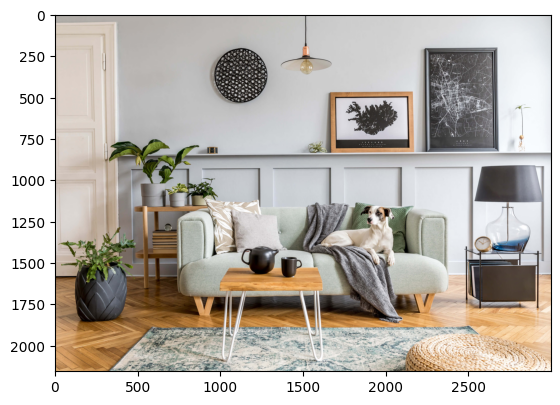

In [7]:
image = Image.open('/home/gtangg12/tiny-eqa/tests/scene.png').convert('RGB')
plt.imshow(image)

In [8]:
model = DinoModel(DinoModelConfig())
batch = transforms.ToTensor()(image).unsqueeze(0)
outputs = model(batch)

Using cache found in /home/gtangg12/.cache/torch/hub/facebookresearch_dinov2_main
/home/gtangg12/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/gtangg12/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/gtangg12/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


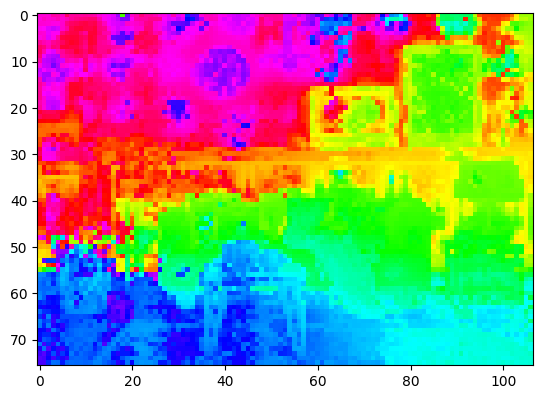

In [10]:
image_dino = visualize_dino(outputs[0])
plt.imshow(image_dino)

In [67]:
from fast_slic import Slic

image = Image.open('/home/gtangg12/tiny-eqa/tests/scene.png').convert('LAB')
image = np.array(image)
import cv2
image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)   # You can convert the image to CIELAB space if you need.
slic = Slic(num_components=2048, compactness=10)
assignment = slic.iterate(image) # Cluster Map
print(assignment.shape)
print(slic.slic_model.clusters) # The cluster information of superpixels.

(2155, 3000)
[{'number': 0, 'yx': (25.0, 34.0), 'color': (142.0, 66.0, 122.0), 'num_members': 1253}, {'number': 1, 'yx': (26.0, 103.0), 'color': (142.0, 66.0, 122.0), 'num_members': 1219}, {'number': 2, 'yx': (25.0, 169.0), 'color': (142.0, 66.0, 122.0), 'num_members': 1131}, {'number': 3, 'yx': (24.0, 234.0), 'color': (142.0, 69.0, 121.0), 'num_members': 1095}, {'number': 4, 'yx': (25.0, 300.0), 'color': (142.0, 67.0, 122.0), 'num_members': 1205}, {'number': 5, 'yx': (27.0, 370.0), 'color': (142.0, 67.0, 122.0), 'num_members': 1188}, {'number': 6, 'yx': (24.0, 430.0), 'color': (142.0, 67.0, 122.0), 'num_members': 1057}, {'number': 7, 'yx': (28.0, 489.0), 'color': (142.0, 67.0, 122.0), 'num_members': 1169}, {'number': 8, 'yx': (30.0, 551.0), 'color': (142.0, 67.0, 122.0), 'num_members': 1255}, {'number': 9, 'yx': (26.0, 619.0), 'color': (143.0, 67.0, 122.0), 'num_members': 1297}, {'number': 10, 'yx': (27.0, 691.0), 'color': (143.0, 67.0, 122.0), 'num_members': 1285}, {'number': 11, 'yx

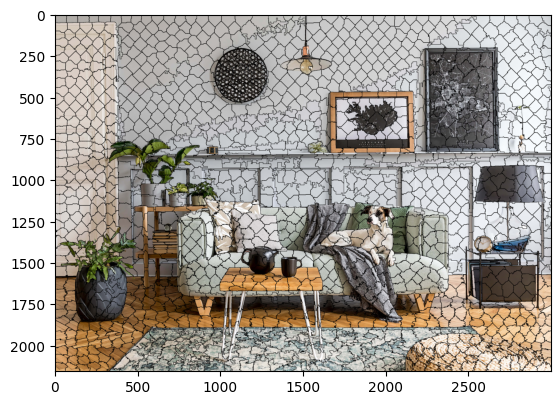

In [72]:
image = Image.open('/home/gtangg12/tiny-eqa/tests/scene.png').convert('RGB')
image = np.array(image)
cmask = plot_outline(assignment, image, color=BLACK)
plt.imshow(cmask)

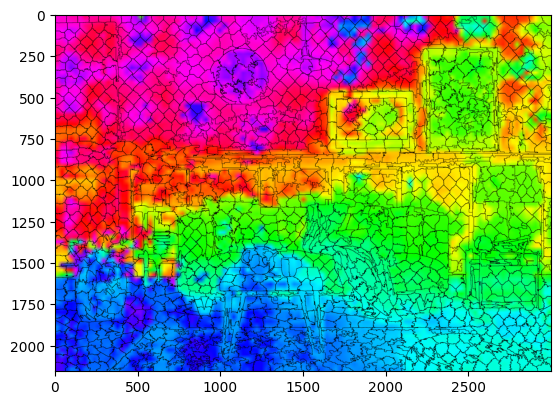

In [73]:
image_dino = np.array(image_dino)
image_dino = cv2.resize(image_dino, (W, H))
cmask = plot_outline(assignment, image_dino, color=BLACK)
plt.imshow(cmask)